# Exponential distibution

In [139]:
# my own func
import random 
import math

def my_expon(lam, n):
    lst = []
    for i in range(n):
        r = random.random()
        x = -math.log(r,math.e) / lam
        lst.append(float('{:.3f}'.format(x)))
    
    return lst
    
# Создание m массивов выборки
def make_vibor_exp(lam, m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(my_expon(lam, m))
        
    l = 1
    #print('Реализация выборки экспоненциального распределени объема %d: '%m)
    #print('')
    for k in A:
        #print('%d): '%l, end='')
        print(*k)
        l += 1
    return A

<font color='red'> Моделирование выбранных случайных величин </font>

In [135]:
make_vibor_exp(0.1, 5)

[11.3396, 0.9625, 57.4477, 64.7878, 1.5075]
[9.7044, 14.0247, 17.5419, 9.8734, 9.0724]
[4.3847, 14.8357, 5.9948, 6.6423, 34.6724]
[30.6441, 1.1795, 19.5554, 16.0444, 9.3733]
[17.1508, 7.887, 4.2636, 22.7333, 0.2077]


[[[11.3396, 0.9625, 57.4477, 64.7878, 1.5075]],
 [[9.7044, 14.0247, 17.5419, 9.8734, 9.0724]],
 [[4.3847, 14.8357, 5.9948, 6.6423, 34.6724]],
 [[30.6441, 1.1795, 19.5554, 16.0444, 9.3733]],
 [[17.1508, 7.887, 4.2636, 22.7333, 0.2077]]]

In [4]:
make_vibor_exp(0.1, 10)

Реализация выборки экспоненциального распределени объема 10: 

1): [1.66, 14.9, 2.17, 20.85, 7.25, 7.47, 5.29, 10.74, 14.86, 5.27]
2): [1.58, 5.13, 1.45, 1.52, 2.33, 11.19, 0.7, 7.63, 7.85, 7.33]
3): [0.22, 0.12, 1.13, 1.98, 4.47, 3.96, 2.78, 0.01, 15.99, 4.01]
4): [1.19, 14.14, 4.37, 29.15, 5.2, 6.9, 27.49, 18.68, 10.77, 0.32]
5): [1.72, 7.55, 17.26, 3.43, 2.78, 8.24, 4.61, 1.95, 18.01, 30.6]


[[[1.66, 14.9, 2.17, 20.85, 7.25, 7.47, 5.29, 10.74, 14.86, 5.27]],
 [[1.58, 5.13, 1.45, 1.52, 2.33, 11.19, 0.7, 7.63, 7.85, 7.33]],
 [[0.22, 0.12, 1.13, 1.98, 4.47, 3.96, 2.78, 0.01, 15.99, 4.01]],
 [[1.19, 14.14, 4.37, 29.15, 5.2, 6.9, 27.49, 18.68, 10.77, 0.32]],
 [[1.72, 7.55, 17.26, 3.43, 2.78, 8.24, 4.61, 1.95, 18.01, 30.6]]]

In [5]:
#make_vibor_exp(0.1, 100)

In [6]:
#make_vibor_exp(0.1, 1000)

In [7]:
#make_vibor_exp(0.1, 10000)

<font color='red'> Построение эмпирической функции распределения </font> 

In [167]:
import pylab
import math 
import matplotlib
import random
import numpy as np
import scipy.stats as sc
from random import randint
import matplotlib.pyplot as plt


# Создание m массивов выборки
def make_vibor_exp(lam, m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(my_expon(lam, m))
        
    l = 1
    #print('Реализация выборки экспоненциального распределени объема %d: '%m)
    #print('')
    for k in A:
        #print('%d): '%l, end='')
        #print(*k)
        l += 1
    return A


def make_efr_expon(M, n, f_x = -1):

    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', ]

    upper_list = []
    
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            #print(i)
            s1 = sorted(set(i)) # вариационный ряд
            capacity_vibor = len(s1)
            
            #словарь: ключ - случайная величина, значение - частота встречаемости
            for k in s1:
                dict_set[k] = [0, 0]

            for t in i: 
                dict_set[t][0] += 1
            
            # Добавление в словарь второго значения - его вероятность 
            for s in dict_set:
                a = dict_set[s][0] / n 
                dict_set[s][1] = float('{:.2f}'.format(a))

            
            lst = []
            for elem in dict_set:
                lst.append([elem, dict_set[elem][1]])
            #print(lst)
            

            #print("Эмпирическая функция для реализации %d выборки объема %s:  "%(sp + 1, n))
            final_sum = 0
            for index in range(len(lst) - 1):
                
                
                #-------------------------------------------------------------upper_limit
                final_sum += lst[index][1]
                #print(lst[index + 1])
                if lst[index ][0] <= f_x <= lst[index + 1][0]:
                    upper_list.append(final_sum)
                
                #-----------------------------------------------------------------------------
                    
                
              
                
                if f_x == -1:
                    
                    x0, y0 = [-2, lst[0][0]], [0,0]
                    x1, y1 = [lst[index][0], lst[index + 1][0]],[final_sum, final_sum]
                    x2, y2 = [lst[len(lst) - 1][0],lst[len(lst) - 1][0] + 2], [1,1]

                    #x3, y3 =[lst[0][0] - 3, lst[len(lst) - 1][0] + 3],[quant, quant]# нахождение квантили


                    plt.grid(True) #Сетка
                    plt.plot(x0,y0, x1,y1, x2, y2, marker = 'o', color = color[sp])

            if lst[len(lst) - 1][0] < f_x:
                    upper_list.append(1)
            #print(upper_list)
        
        if f_x == -1:
            plt.plot(0,0, color = color[sp], label = 'Реализация %d'%(sp+ 1))
            
            pylab.legend ()
            #plt.show()

    return upper_list






def make_сdf_expon():
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sc.expon.ppf(0.01), sc.expon.ppf(0.9), 100)
    

    ax.plot(x, sc.expon.cdf(x),'r-', lw=5, alpha = 0.6, label='expon cdf')

    rv = sc.expon()
    
    #ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
    plt.grid(True) #Сетка
    ax.legend(loc='best', frameon = False)
    #plt.show()

    
def upper_limit_expon(M, n , f_x):
    lol = make_efr_expon(M, n, f_x)
    lol.sort(reverse = True)
        
    fin = -10000 # просто так
    #--------------------------------Ищем разность
    for i in range(len(lol) - 1):
        for k in range(len(lol)):
            res = lol[i] - lol[k]
            if res > fin:
                fin = res


    print('Точная верхняя граница выборки объема %d: '%n, float('{:.4f}'.format(abs(fin))))
    
    

<font color='blue'>Эфр для выборок объема 5: </font> 

[]

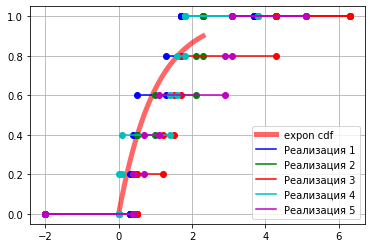

In [150]:
M = make_vibor_exp(0.8, 5)
make_сdf_expon()
make_efr_expon(M, 5)

<font color='blue'>Эфр для выборок объема 10: </font> 

[]

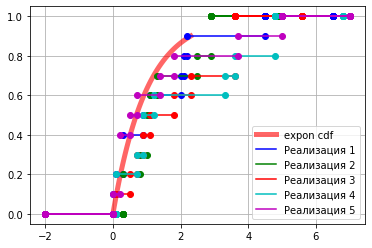

In [146]:
M = make_vibor_exp(0.8, 10)
make_сdf_expon()
make_efr_expon(M, 10)

<font color='blue'>Эфр для выборок объема 100: </font> 

[]

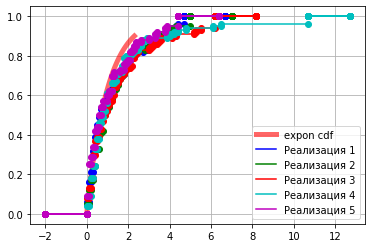

In [147]:
M = make_vibor_exp(0.8, 100)
make_сdf_expon()
make_efr_expon(M, 100)

<font color='blue'>Эфр для выборок объема 1000: </font> 

[]

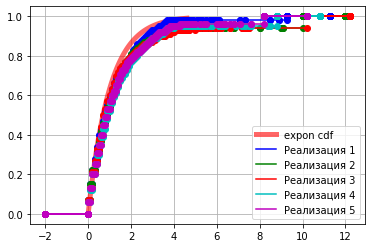

In [141]:
M = make_vibor_exp(0.8, 1000)
make_сdf_expon()
make_efr_expon(M, 1000)

<font color='blue'>Эфр для выборок объема 10**5: </font> 

[]

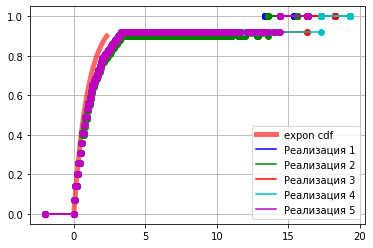

In [148]:
M = make_vibor_exp(0.8, 10**5)
make_сdf_expon()
make_efr_expon(M, 10**5)

<font color='red'> Нахождение точной верхней границы </font> 

<font color='green'> Для n = 5: </font> 

In [168]:
M = make_vibor_exp(0.8, 5)
upper_limit_expon(M, 5, 4)

Точная верхняя граница выборки объема 5:  0.2


<font color='green'> Для n = 10: </font> 

In [169]:
M = make_vibor_exp(0.8, 10)
upper_limit_expon(M, 10, 4)

Точная верхняя граница выборки объема 10:  0.1


<font color='green'> Для n = 100: </font> 

In [170]:
M = make_vibor_exp(0.8, 100)
upper_limit_expon(M, 100, 4)

Точная верхняя граница выборки объема 100:  0.04


<font color='green'> Для n = 1000: </font> 

In [171]:
M = make_vibor_exp(0.8, 1000)
upper_limit_expon(M, 1000, 4)

Точная верхняя граница выборки объема 1000:  0.03


<font color='green'> Для n = 10**5: </font> 

In [172]:
M = make_vibor_exp(0.8, 10**5)
upper_limit_expon(M, 10**5, 4)

Точная верхняя граница выборки объема 100000:  0.01


<font color='red'> Построение вариационного ряда </font> 

In [173]:
#функция для построения вар.рядов для 5 реализаций  выборки M для n
def make_var_row_exp(n, M):
    dict_set = {}
    
    print('Вариационные ряды для 5 реализаций выборки, объема  %d:  '%n)
    print('')
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            s1 = sorted(set(i))
            for k in s1:
                dict_set[k] = 0

            for t in i:
                dict_set[t] += 1

            
            print('X:', end= '\t')
            
            for elem in dict_set:
                print(elem, end='\t')
            print('')
            print('----------'*n)
            print('f:', end= '\t')
            
            for elem in dict_set:
                print(dict_set[elem], end='\t')
            print('')
            print('')
            print('')
            print('')
            #print('------')

In [175]:
M = make_vibor_exp(0.8, 5)
make_var_row_exp(5, M)

Вариационные ряды для 5 реализаций выборки, объема  5:  

X:	0.0	0.4	0.7	1.9	3.8	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.9	1.1	2.0	11.7	
--------------------------------------------------
f:	1	1	2	1	



X:	0.1	0.2	0.4	1.2	2.2	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.3	0.5	0.7	2.6	
--------------------------------------------------
f:	1	1	2	1	



X:	0.2	0.3	0.5	0.9	1.1	
--------------------------------------------------
f:	1	1	1	1	1	





In [176]:
M = make_vibor_exp(0.8, 10)
make_var_row_exp(10, M)

Вариационные ряды для 5 реализаций выборки, объема  10:  

X:	0.0	0.1	0.2	0.3	0.4	0.5	0.8	0.9	1.2	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1	2	1	1	1	1	



X:	0.2	0.6	0.8	1.0	1.7	1.8	2.0	3.2	
----------------------------------------------------------------------------------------------------
f:	1	2	1	1	1	2	1	1	



X:	0.3	0.4	0.7	1.0	1.6	2.0	2.2	2.4	3.1	
----------------------------------------------------------------------------------------------------
f:	1	1	1	2	1	1	1	1	1	



X:	0.2	0.3	0.6	0.9	1.2	1.4	1.5	1.7	2.5	3.3	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1	1	1	1	1	1	1	



X:	0.1	0.2	0.3	1.3	1.5	3.1	3.6	
----------------------------------------------------------------------------------------------------
f:	1	1	4	1	1	1	1	





In [177]:
#M = make_vibor_exp(0.8, 100)
#make_var_row_exp(100, M)

In [178]:
#M = make_vibor_exp(0.8, 1000)
#make_var_row_exp(1000, M)

In [180]:
#M = make_vibor_exp(0.8, 10**5)
#make_var_row_exp(10**5, M)